se
['dori', '128', '12.06', 'samples']


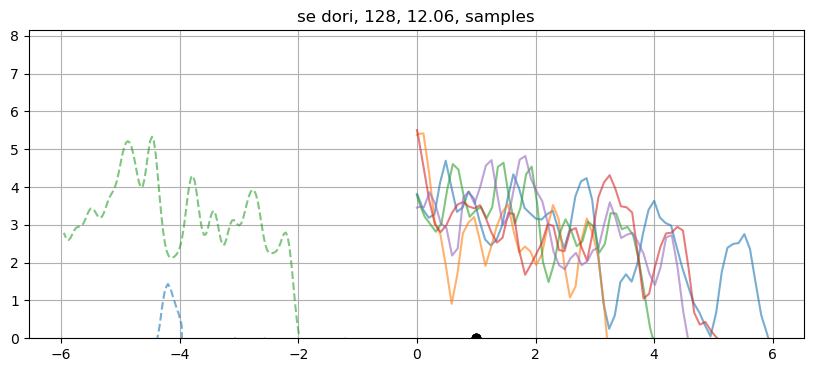

se
['dori', '256', '32.96', 'samples']


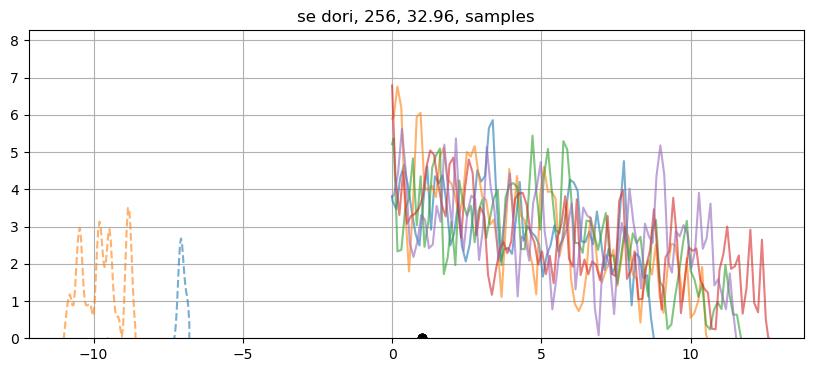

se
['dori', '64', '12.06', 'samples']


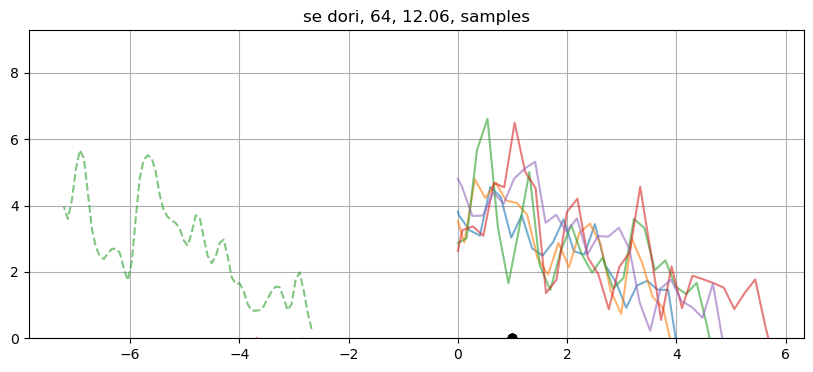

se
['dori', '64', '32.96', 'samples']


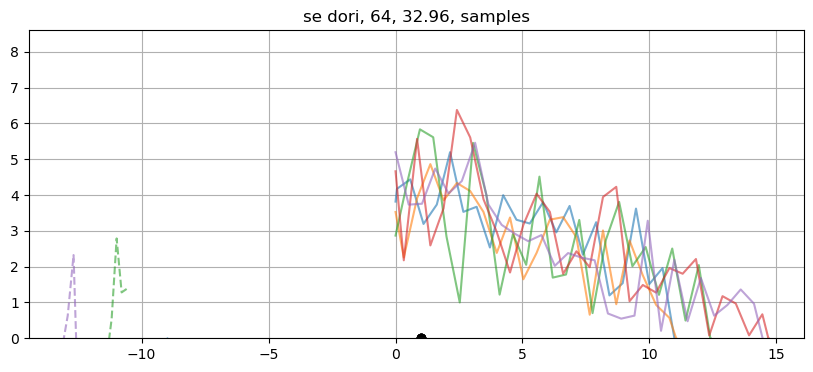

se
['elephant', '128', '12.06', 'samples']


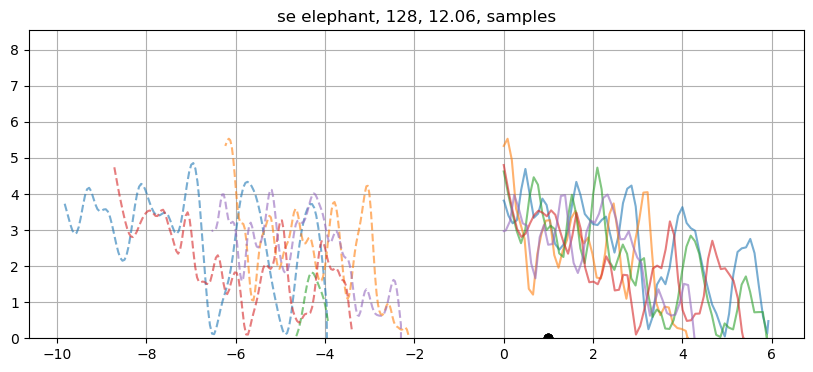

se
['elephant', '256', '32.96', 'samples']


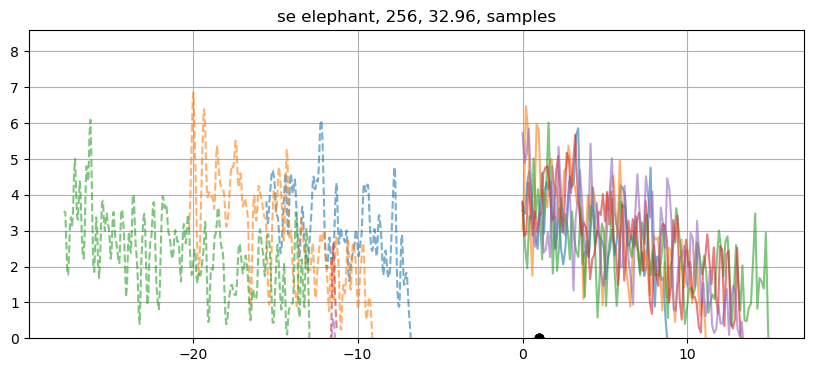

se
['elephant', '64', '12.06', 'samples']


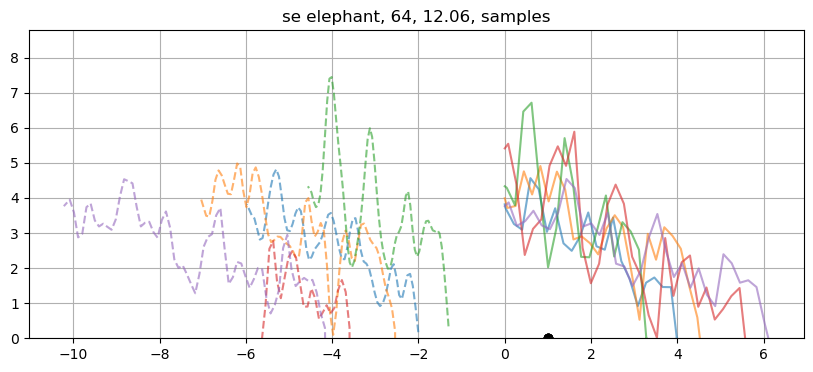

se
['elephant', '64', '32.96', 'samples']


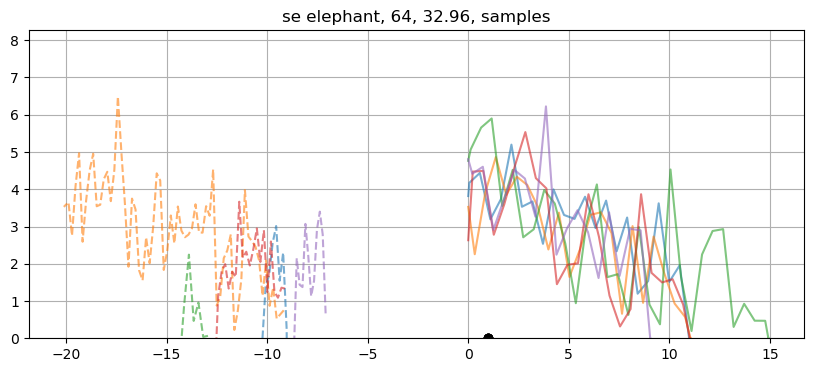

se
['goldfish', '128', '12.06', 'samples']


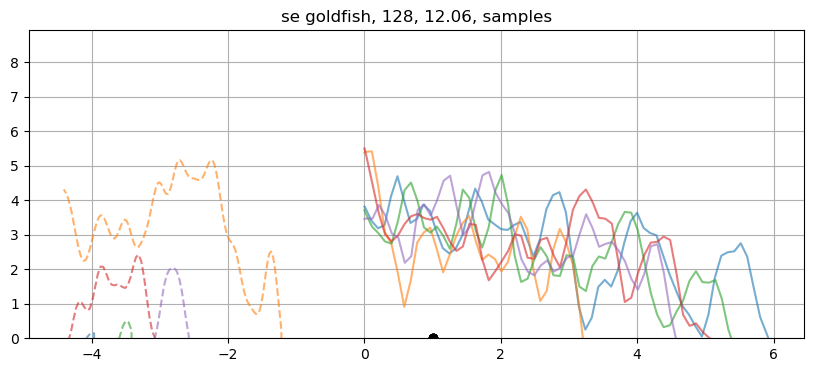

se
['goldfish', '256', '32.96', 'samples']


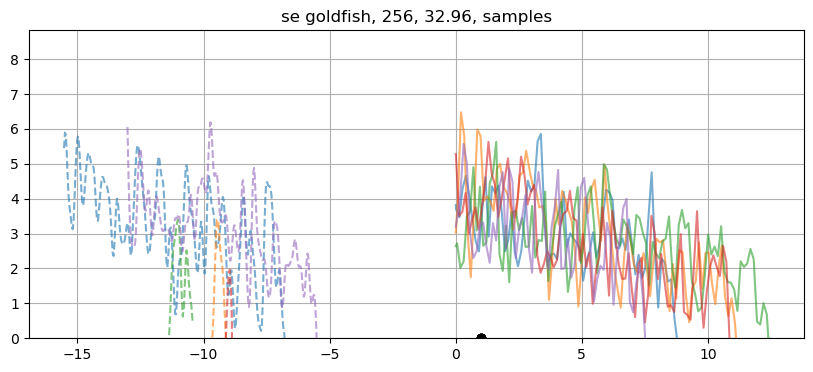

se
['goldfish', '64', '12.06', 'samples']


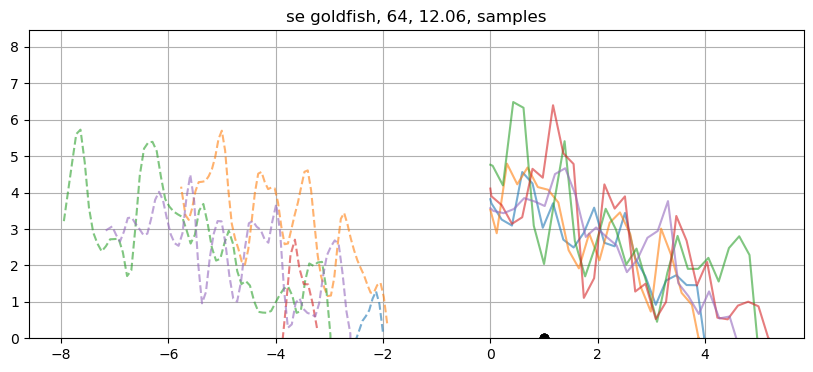

se
['goldfish', '64', '32.96', 'samples']


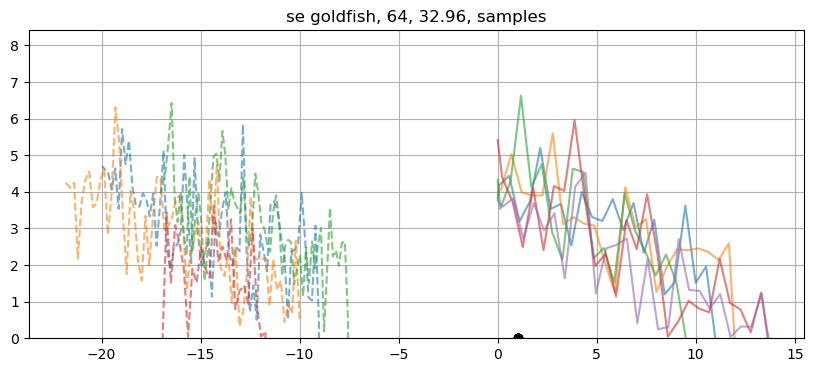

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from utils import *

PLOT_REAL_COUNT = 10

for file in glob.glob("testing/ray-realizations/retro/*/*/*samples.bin"):

    file = file.replace("\\", "/")

    cov = file.split("/")[3]

    print(cov)

    info = os.path.splitext(os.path.basename(file))[0].split("-")

    print(info)

    ctxt = info[0].replace("elephant", "elephant-1")
    microSteps = int(info[1])
    distance = float(info[2])

    nps = microSteps * 2

    ts = np.reshape(np.fromfile(file.replace("samples.", "ts."), dtype=np.float64), (-1,nps))
    samples = np.reshape(np.fromfile(file, dtype=np.float64), (-1,nps))

    fig, ax1 = plt.subplots(1, 1, sharex=False, figsize=(10, 4))

    for t, sample in list(zip(ts,samples))[:5]:
        mapped_ts = t[t != t.max()]/t[t.shape[0]//2]
        p = ax1.plot(mapped_ts[mapped_ts<=1]*t[t.shape[0]//2], sample[t != t.max()][mapped_ts<=1], alpha=0.6)
        ax1.plot((2 - mapped_ts[mapped_ts>1])*t[t.shape[0]//2], sample[t != t.max()][mapped_ts>1], "--", alpha=0.6, color=p[0].get_color())
        ax1.scatter(1, 0, color="black")


    #ax1.set_xticks(np.linspace(np.min(ts), np.min(ts)+distance, microSteps*macroSteps+1),minor=True)
    #ax1.grid(which="minor", linestyle="-", linewidth=0.2)
    ax1.grid(which="major", linestyle="-")
    ax1.set_title(cov + " " + ", ".join(list(info)[:4]))
    ax1.set_ylim(0, np.max(samples) * 1.1)
    #ax1.tick_params(labelbottom=False)

    plt.show()